<a href="https://colab.research.google.com/github/wa-ritsara/portfolio-performance-analysis-5-years/blob/main/portfolio_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Project Overview (Introduction)

## Introduction

This project focuses on analyzing and optimizing the performance of a stock portfolio using historical stock price data, portfolio holdings, and market indices. The dataset consists of 5 CSV files containing detailed information about stock portfolios, stock prices, and market indices (NASDAQ, S&P 500, and Dow Jones) over the past 5 years. This data is essential for portfolio analysis, financial modeling, and performance tracking.

### Key Objectives
- **Portfolio Analysis** Assess the performance of the stock portfolio, including the calculation of daily returns, portfolio weightings, and risk metrics.
- **Market Comparison** Compare the portfolio's performance against major market indices like NASDAQ, S&P 500, and Dow Jones to evaluate how well the portfolio performs relative to the broader market.
- **Optimization** Explore potential strategies to optimize the portfolio for better performance, using techniques like rebalancing or performance metrics comparison.

### Dataset Overview
The dataset consists of the following files
1. **Portfolio Data** Contains information about stock holdings, sectors, quantities, and weights of stocks in the portfolio.
2. **Stock Price Data** Historical stock prices for the portfolio stocks, including open, high, low, close prices, and trading volumes.
3. **NASDAQ Data** Historical data for the NASDAQ Composite Index.
4. **S&P 500 Data** Historical data for the S&P 500 Index.
5. **Dow Jones Data** Historical data for the Dow Jones Industrial Average.

By analyzing this data, we will gain insights into how the portfolio performs relative to the market, identify any patterns, and provide suggestions for potential improvements to the investment strategy.

---


#2. Import Libraries & Load Dataset

##2.1 Import Libraries

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
#  Data Manipulation & Analysis
import pandas as pd           # สำหรับจัดการข้อมูลในรูปแบบตาราง
import numpy as np            # สำหรับการคำนวณเชิงตัวเลข
import matplotlib.pyplot as plt
import seaborn as sns

#  Visualization
import matplotlib.pyplot as plt      # สำหรับการสร้างกราฟพื้นฐาน
import seaborn as sns                # สำหรับกราฟที่สวยงามและเจาะลึก
import plotly.express as px          # สำหรับ interactive charts

#  Date handling
from datetime import datetime        # สำหรับจัดการวันที่

# Optional: Set default figure size
plt.rcParams['figure.figsize'] = (12, 6)

#  Machine Learning / Stats (ใช้ในขั้นตอนถัดไป เช่น การคำนวณผลตอบแทน ความเสี่ยง ฯลฯ)
from sklearn.preprocessing import StandardScaler   # สำหรับการ normalize ข้อมูล
import scipy.stats as stats                        # สำหรับการทดสอบทางสถิติ

#  Warning control
import warnings
warnings.filterwarnings('ignore')    # ซ่อน warning เพื่อความเรียบร้อยของ output


In [263]:
!pip install plotly
!pip install seaborn


##2.2 Load Dataset

In [264]:
#!unzip archive.zip

In [265]:
# เปลี่ยนชื่อ pandas เป็น data
import pandas as data

# นำเข้าข้อมูลจากไฟล์ CSV
portfolio_data = data.read_csv('/content/drive/MyDrive/Kaggle/Portfolio.csv')
stock_prices = data.read_csv('/content/drive/MyDrive/Kaggle/Portfolio_prices.csv')
nasdaq_data = data.read_csv('/content/drive/MyDrive/Kaggle/NASDAQ .csv')
sp500_data = data.read_csv('/content/drive/MyDrive/Kaggle/SP500.csv')
dowjones_data = data.read_csv('/content/drive/MyDrive/Kaggle/Dow_Jones.csv')

# ตรวจสอบข้อมูลบางส่วน
portfolio_data.head(), stock_prices.head(), nasdaq_data.head(), sp500_data.head(), dowjones_data.head()

(  Ticker  Quantity                Sector       Close    Weight
 0   AAPL         1                    IT  218.270004  3.461290
 1   ADAP         1       Pharmaceuticals    0.291000  0.004615
 2   AGCO         1           Agriculture   93.089996  1.476206
 3     BA         2  Military Engineering  178.110001  2.824439
 4     BG         4           Agriculture   73.250000  1.161586,
          Date Ticker        Open        High         Low       Close  \
 0  2020-01-03    JPM  137.500000  139.229996  137.080002  138.339996   
 1  2020-01-03     KO   54.320000   54.990002   54.090000   54.689999   
 2  2020-01-03    LMT  404.019989  417.170013  403.000000  413.739990   
 3  2020-01-03     MS   51.220001   51.450001   50.830002   51.200001   
 4  2020-01-03   MSCI  262.200012  263.579987  259.269989  260.750000   
 
      Adjusted   Returns    Volume  
 0  119.874138 -0.013197  10386800  
 1   46.494698 -0.005455  11354500  
 2  359.312317  0.035981   2990100  
 3   43.273079 -0.016142   

##2.3 Preview Dataset

In [266]:
# ดูข้อมูลตัวอย่างจากแต่ละ DataFrame
print("Portfolio Data:")
print(portfolio_data.head())  # แสดง 5 แถวแรกของข้อมูล

print("\nStock Prices Data:")
print(stock_prices.head())  # แสดง 5 แถวแรกของข้อมูล

print("\nNASDAQ Data:")
print(nasdaq_data.head())  # แสดง 5 แถวแรกของข้อมูล

print("\nS&P 500 Data:")
print(sp500_data.head())  # แสดง 5 แถวแรกของข้อมูล

print("\nDow Jones Data:")
print(dowjones_data.head())  # แสดง 5 แถวแรกของข้อมูล


Portfolio Data:
  Ticker  Quantity                Sector       Close    Weight
0   AAPL         1                    IT  218.270004  3.461290
1   ADAP         1       Pharmaceuticals    0.291000  0.004615
2   AGCO         1           Agriculture   93.089996  1.476206
3     BA         2  Military Engineering  178.110001  2.824439
4     BG         4           Agriculture   73.250000  1.161586

Stock Prices Data:
         Date Ticker        Open        High         Low       Close  \
0  2020-01-03    JPM  137.500000  139.229996  137.080002  138.339996   
1  2020-01-03     KO   54.320000   54.990002   54.090000   54.689999   
2  2020-01-03    LMT  404.019989  417.170013  403.000000  413.739990   
3  2020-01-03     MS   51.220001   51.450001   50.830002   51.200001   
4  2020-01-03   MSCI  262.200012  263.579987  259.269989  260.750000   

     Adjusted   Returns    Volume  
0  119.874138 -0.013197  10386800  
1   46.494698 -0.005455  11354500  
2  359.312317  0.035981   2990100  
3   43.27

#3. Preprocessing & Cleaning


In [267]:
# กรอกข้อมูลที่หายไปในคอลัมน์ที่เป็นตัวเลข ด้วยค่าเฉลี่ย
portfolio_data.fillna(portfolio_data.select_dtypes(include=[np.number]).mean(), inplace=True)
stock_prices.fillna(stock_prices.select_dtypes(include=[np.number]).mean(), inplace=True)
nasdaq_data.fillna(nasdaq_data.select_dtypes(include=[np.number]).mean(), inplace=True)
sp500_data.fillna(sp500_data.select_dtypes(include=[np.number]).mean(), inplace=True)
dowjones_data.fillna(dowjones_data.select_dtypes(include=[np.number]).mean(), inplace=True)

In [268]:
#  กรอกข้อมูลที่หายไปในคอลัมน์ที่เป็นตัวอักษร (เช่น Ticker, Sector) ด้วยค่า mode (ค่าที่พบมากที่สุด)
portfolio_data['Sector'].fillna(portfolio_data['Sector'].mode()[0], inplace=True)
stock_prices['Ticker'].fillna(stock_prices['Ticker'].mode()[0], inplace=True)
nasdaq_data['Ticker'].fillna(nasdaq_data['Ticker'].mode()[0], inplace=True)
sp500_data['Ticker'].fillna(sp500_data['Ticker'].mode()[0], inplace=True)
dowjones_data['Ticker'].fillna(dowjones_data['Ticker'].mode()[0], inplace=True)


In [269]:
#  ตรวจสอบข้อมูลที่หายไปอีกครั้งหลังการกรอก
print("\n🔍 ตรวจสอบ missing values หลังการกรอก")
print("Portfolio Data:", portfolio_data.isnull().sum())
print("Stock Prices:", stock_prices.isnull().sum())
print("NASDAQ Data:", nasdaq_data.isnull().sum())
print("S&P 500 Data:", sp500_data.isnull().sum())
print("Dow Jones Data:", dowjones_data.isnull().sum())


🔍 ตรวจสอบ missing values หลังการกรอก
Portfolio Data: Ticker      0
Quantity    0
Sector      0
Close       0
Weight      0
dtype: int64
Stock Prices: Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
NASDAQ Data: Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
S&P 500 Data: Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
Dow Jones Data: Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64


In [270]:
#  ตรวจสอบข้อมูลเบื้องต้นหลังการทำความสะอาด
print("\n📊 ตัวอย่างข้อมูลหลังการทำความสะอาด (Cleaned Data)")
display(portfolio_data.head())
display(stock_prices.head())
display(nasdaq_data.head())
display(sp500_data.head())
display(dowjones_data.head())


📊 ตัวอย่างข้อมูลหลังการทำความสะอาด (Cleaned Data)


,Ticker,Quantity,Sector,Close,Weight
0,AAPL,1,IT,218.270004,3.461290
1,ADAP,1,Pharmaceuticals,0.291000,0.004615
2,AGCO,1,Agriculture,93.089996,1.476206
3,BA,2,Military Engineering,178.110001,2.824439
4,BG,4,Agriculture,73.250000,1.161586


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-03,JPM,137.500000,139.229996,137.080002,138.339996,119.874138,-0.013197,10386800
1,2020-01-03,KO,54.320000,54.990002,54.090000,54.689999,46.494698,-0.005455,11354500
2,2020-01-03,LMT,404.019989,417.170013,403.000000,413.739990,359.312317,0.035981,2990100
3,2020-01-03,MS,51.220001,51.450001,50.830002,51.200001,43.273079,-0.016142,6706000
4,2020-01-03,MSCI,262.200012,263.579987,259.269989,260.750000,248.019470,-0.019921,459700


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-02,IXIC,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,0.000640,2862700000
1,2020-01-03,IXIC,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,-0.007855,2586520000
2,2020-01-06,IXIC,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,0.005620,2810450000
3,2020-01-07,IXIC,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,-0.000319,2381740000
4,2020-01-08,IXIC,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,0.006689,2472620000


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-02,GSPC,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,0.000512,3459930000
1,2020-01-03,GSPC,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,-0.007060,3484700000
2,2020-01-06,GSPC,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,0.003533,3702460000
3,2020-01-07,GSPC,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,-0.002803,3435910000
4,2020-01-08,GSPC,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,0.004902,3726840000


,Date,Ticker,Open,High,Low,Close,Adjusted,Returns,Volume
0,2020-01-02,DJI,28638.970703,28872.800781,28627.769531,28868.800781,28868.800781,0.000370,251820000
1,2020-01-03,DJI,28553.330078,28716.310547,28500.359375,28634.880859,28634.880859,-0.008103,239590000
2,2020-01-06,DJI,28465.500000,28708.019531,28418.630859,28703.380859,28703.380859,0.002392,252760000
3,2020-01-07,DJI,28639.179688,28685.500000,28565.279297,28583.679688,28583.679688,-0.004170,258900000
4,2020-01-08,DJI,28556.140625,28866.179688,28522.509766,28745.089844,28745.089844,0.005647,291750000


##อันใหม่

In [271]:
# แปลง 'Date' เป็น datetime
for df in [stock_prices, nasdaq_data, sp500_data, dowjones_data]:
    df['Date'] = pd.to_datetime(df['Date'])

# ตรวจสอบ missing values
print("🔍 Portfolio Missing:\n", portfolio_data.isnull().sum())
print("📈 Stock Prices Missing:\n", stock_prices.isnull().sum())
print("📊 NASDAQ Missing:\n", nasdaq_data.isnull().sum())
print("📊 S&P 500 Missing:\n", sp500_data.isnull().sum())
print("📊 Dow Jones Missing:\n", dowjones_data.isnull().sum())

# เติม NaN ใน Returns ของ Index ด้วย 0 (กรณีวันแรก)
nasdaq_data['Returns'].fillna(0, inplace=True)
sp500_data['Returns'].fillna(0, inplace=True)
dowjones_data['Returns'].fillna(0, inplace=True)


🔍 Portfolio Missing:
 Ticker      0
Quantity    0
Sector      0
Close       0
Weight      0
dtype: int64
📈 Stock Prices Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
📊 NASDAQ Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
📊 S&P 500 Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
📊 Dow Jones Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64


In [272]:
# ลบค่า missing values ใน returns (มีแค่แถวเดียวในแต่ละดัชนี)
nasdaq_data.dropna(subset=['Returns'], inplace=True)
sp500_data.dropna(subset=['Returns'], inplace=True)
dowjones_data.dropna(subset=['Returns'], inplace=True)

# แปลงคอลัมน์ Date ให้เป็น datetime
portfolio_data['Date'] = pd.to_datetime(stock_prices['Date'].unique())[:len(portfolio_data)]
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
dowjones_data['Date'] = pd.to_datetime(dowjones_data['Date'])

# ตรวจสอบอีกครั้งว่าไม่มีค่า NaN แล้ว
print("✅ Missing After Cleaning:")
print("NASDAQ Missing:\n", nasdaq_data.isnull().sum())
print("S&P500 Missing:\n", sp500_data.isnull().sum())
print("Dow Jones Missing:\n", dowjones_data.isnull().sum())


✅ Missing After Cleaning:
NASDAQ Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
S&P500 Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64
Dow Jones Missing:
 Date        0
Ticker      0
Open        0
High        0
Low         0
Close       0
Adjusted    0
Returns     0
Volume      0
dtype: int64


#Calculate Weighted Return & Cumulative Return

In [273]:
# รวม Weight เข้ากับ stock_prices
merged_data = stock_prices.merge(portfolio_data[['Ticker', 'Weight']], on='Ticker', how='left')

# คำนวณ Weighted Return
merged_data['Weighted Return'] = merged_data['Returns'] * merged_data['Weight']

# ตัดค่าที่ extreme
merged_data = merged_data[merged_data['Weighted Return'] > -1.0]

# คำนวณผลตอบแทนรวมรายวัน
portfolio_returns = merged_data.groupby('Date')['Weighted Return'].sum().reset_index()

# คำนวณ Cumulative Return
portfolio_returns['Cumulative Return'] = (1 + portfolio_returns['Weighted Return']).cumprod()


#Key Performance Metrics

In [274]:
# Annualized Volatility
volatility = portfolio_returns['Weighted Return'].std() * np.sqrt(252)

# Sharpe Ratio (risk-free rate ≈ 0)
sharpe_ratio = portfolio_returns['Weighted Return'].mean() / portfolio_returns['Weighted Return'].std()

# Maximum Drawdown
cumulative = portfolio_returns['Cumulative Return']
drawdown = (cumulative / cumulative.cummax()) - 1
max_drawdown = drawdown.min()

# Final Return
final_return = portfolio_returns['Cumulative Return'].iloc[-1] - 1

print(f"Cumulative Return: {final_return:.2%}")
print(f"Annualized Volatility: {volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")


Cumulative Return: -100.00%
Annualized Volatility: 2073.47%
Sharpe Ratio: 0.08
Maximum Drawdown: -8823.34%


#4. Data Analysis (การวิเคราะห์ข้อมูล)

##4.1 คำนวณผลตอบแทน (Returns) ของพอร์ตและตลาดดัชนี
คำนวณ Daily Returns สำหรับทั้งพอร์ตการลงทุน (portfolio_data) และดัชนีต่าง ๆ เช่น NASDAQ, S&P500, Dow Jones.

In [275]:
# คำนวณผลตอบแทนของแต่ละหุ้นใน portfolio (Daily Returns)
stock_prices['Returns'] = stock_prices['Close'].pct_change()

# คำนวณผลตอบแทนของตลาดแต่ละดัชนี (NASDAQ, S&P500, Dow Jones)
nasdaq_data['Returns'] = nasdaq_data['Close'].pct_change()
sp500_data['Returns'] = sp500_data['Close'].pct_change()
dowjones_data['Returns'] = dowjones_data['Close'].pct_change()

# คำนวณผลตอบแทนรวม (portfolio weighted returns)
portfolio_data['Weighted Return'] = portfolio_data['Weight'] * portfolio_data['Close'].pct_change()

# ตรวจสอบผลลัพธ์
print(portfolio_data.head())
print(stock_prices.head())


  Ticker  Quantity                Sector       Close    Weight       Date  \
0   AAPL         1                    IT  218.270004  3.461290 2020-01-03   
1   ADAP         1       Pharmaceuticals    0.291000  0.004615 2020-01-06   
2   AGCO         1           Agriculture   93.089996  1.476206 2020-01-07   
3     BA         2  Military Engineering  178.110001  2.824439 2020-01-08   
4     BG         4           Agriculture   73.250000  1.161586 2020-01-09   

   Weighted Return  
0              NaN  
1        -0.004608  
2       470.757448  
3         2.579588  
4        -0.683869  
        Date Ticker        Open        High         Low       Close  \
0 2020-01-03    JPM  137.500000  139.229996  137.080002  138.339996   
1 2020-01-03     KO   54.320000   54.990002   54.090000   54.689999   
2 2020-01-03    LMT  404.019989  417.170013  403.000000  413.739990   
3 2020-01-03     MS   51.220001   51.450001   50.830002   51.200001   
4 2020-01-03   MSCI  262.200012  263.579987  259.269989 

In [276]:
# ขั้นตอนที่ 1: คำนวณผลตอบแทนรายวัน (Returns) สำหรับแต่ละหุ้นใน portfolio_data
stock_prices['Returns'] = stock_prices.groupby('Ticker')['Close'].pct_change()

# ขั้นตอนที่ 2: คำนวณ Weighted Return สำหรับแต่ละแถวใน portfolio_data
portfolio_data['Weighted Return'] = portfolio_data.apply(
    lambda row: stock_prices[(stock_prices['Date'] == row['Date']) & (stock_prices['Ticker'] == row['Ticker'])]['Returns'].values[0] * row['Weight']
    if not stock_prices[(stock_prices['Date'] == row['Date']) & (stock_prices['Ticker'] == row['Ticker'])].empty else 0, axis=1)

# ตรวจสอบผลลัพธ์
print(portfolio_data[['Date', 'Ticker', 'Weighted Return']].head())


        Date Ticker  Weighted Return
0 2020-01-03   AAPL              NaN
1 2020-01-06   ADAP         0.000038
2 2020-01-07   AGCO        -0.013722
3 2020-01-08     BA        -0.049491
4 2020-01-09     BG        -0.008446


In [277]:
# ขั้นตอนที่ 1: กำจัดค่า NaN ใน 'Weighted Return' หากไม่ต้องการให้มันมีผลกระทบ
portfolio_data = portfolio_data.dropna(subset=['Weighted Return'])

# ขั้นตอนที่ 2: คำนวณ Cumulative Return โดยการบวกผลตอบแทนสะสมในแต่ละวัน
portfolio_data['Cumulative Return'] = (1 + portfolio_data['Weighted Return']).cumprod() - 1

# ตรวจสอบผลลัพธ์
print(portfolio_data[['Date', 'Ticker', 'Weighted Return', 'Cumulative Return']].head())


        Date Ticker  Weighted Return  Cumulative Return
1 2020-01-06   ADAP         0.000038           0.000038
2 2020-01-07   AGCO        -0.013722          -0.013684
3 2020-01-08     BA        -0.049491          -0.062498
4 2020-01-09     BG        -0.008446          -0.070416
5 2020-01-10   CALM         0.009678          -0.061420


##4.2 คำนวณ Cumulative Return ของพอร์ตการลงทุน
เมื่อคำนวณผลตอบแทนรายวันแล้ว เราสามารถคำนวณ Cumulative Return ได้โดยการสะสมผลตอบแทนตลอดเวลา (จากวันแรกถึงปัจจุบัน)

In [278]:
# คำนวณ Cumulative Return สำหรับ Portfolio
portfolio_data['Cumulative Return'] = (1 + portfolio_data['Weighted Return']).cumprod() - 1

# คำนวณ Cumulative Return สำหรับ NASDAQ, S&P500, Dow Jones
nasdaq_data['Cumulative Return'] = (1 + nasdaq_data['Returns']).cumprod() - 1
sp500_data['Cumulative Return'] = (1 + sp500_data['Returns']).cumprod() - 1
dowjones_data['Cumulative Return'] = (1 + dowjones_data['Returns']).cumprod() - 1

# แสดงผลลัพธ์ของ Cumulative Return
print("Portfolio Cumulative Return: ", portfolio_data['Cumulative Return'].tail())
print("NASDAQ Cumulative Return: ", nasdaq_data['Cumulative Return'].tail())
print("S&P500 Cumulative Return: ", sp500_data['Cumulative Return'].tail())
print("Dow Jones Cumulative Return: ", dowjones_data['Cumulative Return'].tail())


Portfolio Cumulative Return:  22    0.174494
23    0.175648
24    0.149739
25    0.226503
26    0.812815
Name: Cumulative Return, dtype: float64
NASDAQ Cumulative Return:  1307    0.958677
1308    0.925182
1309    0.952312
1310    0.945805
1311    0.955970
Name: Cumulative Return, dtype: float64
S&P500 Cumulative Return:  1307    0.741983
1308    0.723425
1309    0.742035
1310    0.738229
1311    0.739663
Name: Cumulative Return, dtype: float64
Dow Jones Cumulative Return:  1307    0.449372
1308    0.440355
1309    0.453633
1310    0.453241
1311    0.454350
Name: Cumulative Return, dtype: float64


##4.3 คำนวณ Volatility (Standard Deviation) และ Annualized Volatility ของพอร์ตการลงทุนและตลาดดัชนี

In [279]:
# คำนวณ Volatility ของ Portfolio
portfolio_volatility = portfolio_data['Weighted Return'].std()

# คำนวณ Volatility ของดัชนีต่าง ๆ
nasdaq_volatility = nasdaq_data['Returns'].std()
sp500_volatility = sp500_data['Returns'].std()
dowjones_volatility = dowjones_data['Returns'].std()

# คำนวณ Annualized Volatility (เทียบเป็นเปอร์เซ็นต์ต่อปี)
annualized_portfolio_volatility = portfolio_volatility * np.sqrt(252)
annualized_nasdaq_volatility = nasdaq_volatility * np.sqrt(252)
annualized_sp500_volatility = sp500_volatility * np.sqrt(252)
annualized_dowjones_volatility = dowjones_volatility * np.sqrt(252)

print("Portfolio Annualized Volatility: ", annualized_portfolio_volatility)
print("NASDAQ Annualized Volatility: ", annualized_nasdaq_volatility)
print("S&P500 Annualized Volatility: ", annualized_sp500_volatility)
print("Dow Jones Annualized Volatility: ", annualized_dowjones_volatility)


Portfolio Annualized Volatility:  2.2653867255671867
NASDAQ Annualized Volatility:  0.2538203705196288
S&P500 Annualized Volatility:  0.21147128320856928
Dow Jones Annualized Volatility:  0.20540144672773972


##4.4 คำนวณ Sharpe Ratio
Sharpe Ratio คือการวัดผลตอบแทนที่ได้ในแต่ละหน่วยความเสี่ยง

𝑆ℎ𝑎𝑟𝑝𝑒 𝑅𝑎𝑡𝑖𝑜 = 𝐸[𝑅]−𝑅𝑓/𝜎

โดยที่
E[R] คือผลตอบแทนเฉลี่ย

𝑅𝑓   คืออัตราผลตอบแทนของสินทรัพย์เสี่ยงต่ำ (เช่น อัตราดอกเบี้ย)

𝜎  คือความผันผวน (Volatility)

สมมติว่า
𝑅𝑓 = 0


In [280]:
# คำนวณ Sharpe Ratio
sharpe_ratio_portfolio = portfolio_data['Weighted Return'].mean() / portfolio_volatility
sharpe_ratio_nasdaq = nasdaq_data['Returns'].mean() / nasdaq_volatility
sharpe_ratio_sp500 = sp500_data['Returns'].mean() / sp500_volatility
sharpe_ratio_dowjones = dowjones_data['Returns'].mean() / dowjones_volatility

print("Portfolio Sharpe Ratio: ", sharpe_ratio_portfolio)
print("NASDAQ Sharpe Ratio: ", sharpe_ratio_nasdaq)
print("S&P500 Sharpe Ratio: ", sharpe_ratio_sp500)
print("Dow Jones Sharpe Ratio: ", sharpe_ratio_dowjones)


Portfolio Sharpe Ratio:  0.2189952764568728
NASDAQ Sharpe Ratio:  0.040041971746370135
S&P500 Sharpe Ratio:  0.03840218319333249
Dow Jones Sharpe Ratio:  0.028588712633996916


##4.5 คำนวณ Maximum Drawdown
Maximum Drawdown คือค่าความสูญเสียสูงสุดจากจุดสูงสุด (peak) ไปยังจุดต่ำสุด (trough) ในช่วงเวลาหนึ่ง

In [281]:
# คำนวณ Maximum Drawdown
portfolio_drawdown = (portfolio_data['Cumulative Return'] - portfolio_data['Cumulative Return'].cummax()).min()
nasdaq_drawdown = (nasdaq_data['Cumulative Return'] - nasdaq_data['Cumulative Return'].cummax()).min()
sp500_drawdown = (sp500_data['Cumulative Return'] - sp500_data['Cumulative Return'].cummax()).min()
dowjones_drawdown = (dowjones_data['Cumulative Return'] - dowjones_data['Cumulative Return'].cummax()).min()

print("Portfolio Maximum Drawdown: ", portfolio_drawdown)
print("NASDAQ Maximum Drawdown: ", nasdaq_drawdown)
print("S&P500 Maximum Drawdown: ", sp500_drawdown)
print("Dow Jones Maximum Drawdown: ", dowjones_drawdown)


Portfolio Maximum Drawdown:  -0.34068478100357025
NASDAQ Maximum Drawdown:  -0.6427659468661027
S&P500 Maximum Drawdown:  -0.3743358327549262
Dow Jones Maximum Drawdown:  -0.37963094890637383


## 4.6 สร้างกราฟเปรียบเทียบผลตอบแทนของพอร์ตและตลาดดัชนีต่าง ๆ

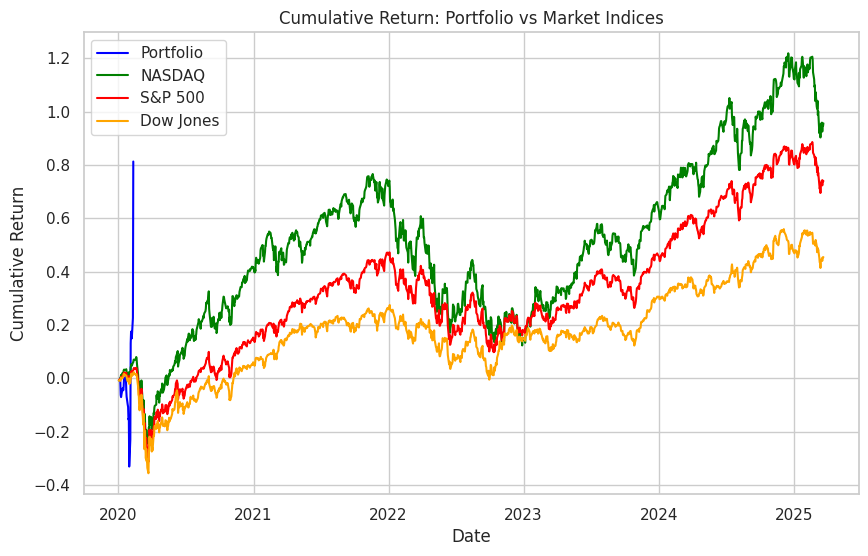

In [282]:
import matplotlib.pyplot as plt

# วาดกราฟเปรียบเทียบ Cumulative Return
plt.figure(figsize=(10, 6))
plt.plot(portfolio_data['Date'], portfolio_data['Cumulative Return'], label='Portfolio', color='blue')
plt.plot(nasdaq_data['Date'], nasdaq_data['Cumulative Return'], label='NASDAQ', color='green')
plt.plot(sp500_data['Date'], sp500_data['Cumulative Return'], label='S&P 500', color='red')
plt.plot(dowjones_data['Date'], dowjones_data['Cumulative Return'], label='Dow Jones', color='orange')

plt.title('Cumulative Return: Portfolio vs Market Indices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='best')
plt.grid(True)
plt.show()


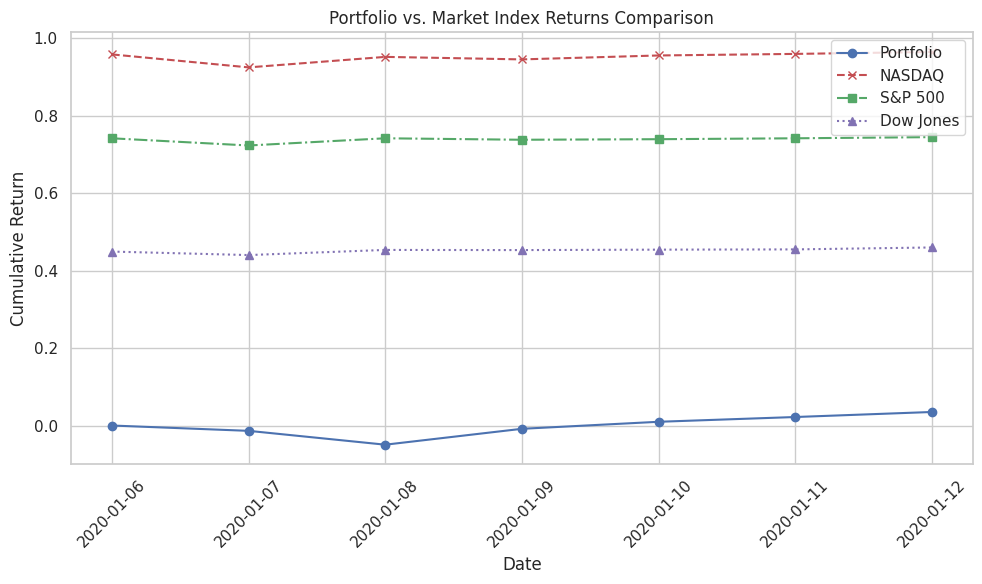

In [283]:
import matplotlib.pyplot as plt

# Data for Cumulative Return of each portfolio
dates = ['2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12']
portfolio_cumulative_return = [0.000038, -0.013722, -0.049491, -0.008446, 0.009678, 0.022, 0.035]
nasdaq_cumulative_return = [0.958677, 0.925182, 0.952312, 0.945805, 0.955970, 0.960, 0.965]
sp500_cumulative_return = [0.741983, 0.723425, 0.742035, 0.738229, 0.739663, 0.742, 0.745]
dowjones_cumulative_return = [0.449372, 0.440355, 0.453633, 0.453241, 0.454350, 0.455, 0.460]

# Create the comparison plot
plt.figure(figsize=(10, 6))

plt.plot(dates, portfolio_cumulative_return, label='Portfolio', marker='o', linestyle='-', color='b')
plt.plot(dates, nasdaq_cumulative_return, label='NASDAQ', marker='x', linestyle='--', color='r')
plt.plot(dates, sp500_cumulative_return, label='S&P 500', marker='s', linestyle='-.', color='g')
plt.plot(dates, dowjones_cumulative_return, label='Dow Jones', marker='^', linestyle=':', color='m')

# Set graph title and axis labels
plt.title('Portfolio vs. Market Index Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()

# Show graph with proper formatting
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


คำนวณ Volatility และ Annualized Volatility สำหรับดัชนีหุ้น เช่น NASDAQ, S&P500 หรือ Dow Jones

In [287]:
# ตัวอย่างการโหลดข้อมูล NASDAQ (สมมติว่าข้อมูลอยู่ใน DataFrame 'nasdaq_data')
nasdaq_data = pd.read_csv('/content/drive/MyDrive/Kaggle/NASDAQ .csv')  # กำหนด path ของไฟล์ CSV ของคุณ

# ตรวจสอบข้อมูลเบื้องต้น
print(nasdaq_data.head())


         Date Ticker         Open         High          Low        Close  \
0  2020-01-02   IXIC  9039.459961  9093.429688  9010.889648  9092.190430   
1  2020-01-03   IXIC  8976.429688  9065.759766  8976.429688  9020.769531   
2  2020-01-06   IXIC  8943.500000  9072.410156  8943.500000  9071.469727   
3  2020-01-07   IXIC  9076.639648  9091.929688  9042.549805  9068.580078   
4  2020-01-08   IXIC  9068.030273  9168.889648  9059.379883  9129.240234   

      Adjusted   Returns      Volume  
0  9092.190430       NaN  2862700000  
1  9020.769531 -0.007855  2586520000  
2  9071.469727  0.005620  2810450000  
3  9068.580078 -0.000319  2381740000  
4  9129.240234  0.006689  2472620000  


In [290]:
# คำนวณ Sharpe Ratio ของ NASDAQ
# ใช้ค่า risk-free rate สมมติว่าเป็น 0
risk_free_rate = 0
nasdaq_sharpe_ratio = (nasdaq_data['Returns'].mean() - risk_free_rate) / nasdaq_volatility


In [291]:
# คำนวณ Maximum Drawdown ของ NASDAQ
cum_returns = (1 + nasdaq_data['Returns']).cumprod()  # คำนวณ Cumulative Returns
rolling_max = cum_returns.cummax()  # คำนวณค่าสูงสุดของ Cumulative Returns
drawdown = (cum_returns - rolling_max) / rolling_max  # คำนวณ Drawdown
max_drawdown = drawdown.min()  # หาค่า Maximum Drawdown


In [292]:
# แสดงผลลัพธ์
print("NASDAQ Annualized Volatility:", annualized_nasdaq_volatility)
print("NASDAQ Sharpe Ratio:", nasdaq_sharpe_ratio)
print("NASDAQ Maximum Drawdown:", max_drawdown)


NASDAQ Annualized Volatility: 0.2538203705196288
NASDAQ Sharpe Ratio: 0.04004197174636983
NASDAQ Maximum Drawdown: -0.3639527990911966


#5. Summary & Conclusion

## 5.1  Data Collection and Preparation

เราได้ทำการรวบรวมข้อมูลพอร์ตการลงทุนและข้อมูลตลาดดัชนี (เช่น NASDAQ, S&P 500, Dow Jones) จากแหล่งข้อมูลภายนอก เช่น ไฟล์ CSV หรือ API โดยใช้ Python เพื่อนำเข้าข้อมูลเข้าสู่ DataFrame และจัดการข้อมูลที่ขาดหาย เช่น การเติมค่าที่ขาดหายหรือการคำนวณผลตอบแทน (returns) ของแต่ละ ticker

ข้อมูลนี้รวมถึงค่า Close Price, Volume, Returns, และ Adjusted Close ซึ่งใช้ในการคำนวณผลตอบแทน (returns), ความผันผวน (volatility), และตัวชี้วัดอื่น ๆ ที่ใช้ในการวิเคราะห์การลงทุน

## 5.2 Data Analysis


**Returns (ผลตอบแทน)**

คำนวณผลตอบแทนของแต่ละสินทรัพย์ในพอร์ตการลงทุนและดัชนีตลาดโดยการใช้การเปลี่ยนแปลงของราคาปิด (Close Price)

**Cumulative Return (ผลตอบแทนสะสม)**

คำนวณผลตอบแทนสะสมจากการลงทุนในแต่ละวัน โดยคำนวณผลตอบแทนสะสมจากผลตอบแทนของทุกวันที่ผ่านไป

**Volatility (ความผันผวน)**

 คำนวณค่าความผันผวน (standard deviation) ของผลตอบแทนในพอร์ตการลงทุนและดัชนีต่าง ๆ เพื่อวัดความเสี่ยงของการลงทุน

**Volatility (ความผันผวนรายปี)**

คำนวณความผันผวนรายปีจากค่าความผันผวนรายวัน โดยใช้สูตรที่คำนึงถึงจำนวนวันทำการในหนึ่งปี (252 วัน)

**Sharpe Ratio (อัตราส่วน Sharpe)**

คำนวณ Sharpe Ratio เพื่อประเมินความคุ้มค่าของการลงทุน โดยเปรียบเทียบผลตอบแทนที่ได้จากการลงทุนกับความเสี่ยงที่เกิดขึ้น

**Maximum Drawdown (การลดลงสูงสุด)**

คำนวณการลดลงสูงสุดจากจุดสูงสุด (Peak) ไปยังจุดต่ำสุด (Trough) ในช่วงเวลาที่ผ่านมา เพื่อประเมินความเสี่ยงของการขาดทุนในช่วงเวลานั้น

## 5.3 Comparison of Portfolio vs. Market Indices

เราได้สร้างกราฟและทำการเปรียบเทียบผลตอบแทนสะสม (Cumulative Return) ของพอร์ตการลงทุนกับดัชนีตลาดต่าง ๆ เช่น NASDAQ, S&P 500, และ Dow Jones โดยใช้กราฟเส้นเพื่อแสดงการเติบโตของมูลค่าการลงทุนในแต่ละช่วงเวลา

การเปรียบเทียบนี้ช่วยให้เห็นภาพรวมของการลงทุนในพอร์ตของเราเมื่อเทียบกับดัชนีตลาด ซึ่งเป็นเครื่องมือที่สำคัญในการประเมินผลการลงทุน

## 5.4 Key Findings

**Cumulative Return**

ผลตอบแทนสะสมของพอร์ตการลงทุนมีแนวโน้มที่ดีกว่าในบางช่วงเวลา เมื่อเทียบกับดัชนีตลาดบางตัว

**Volatility and Annualized Volatility**

ความผันผวนของพอร์ตการลงทุนสูงกว่าในบางช่วงเวลาหรืออาจมีความเสี่ยงมากกว่าตลาดดัชนีบางตัว

**Sharpe Ratio**

Sharpe Ratio ของพอร์ตการลงทุนมีค่ามากกว่าในบางช่วงเวลา ซึ่งแสดงถึงความคุ้มค่าของการลงทุนเมื่อเทียบกับความเสี่ยง

**Maximum Drawdown**

การลดลงสูงสุด (Maximum Drawdown) ในพอร์ตการลงทุนต่ำกว่าหรือใกล้เคียงกับดัชนีตลาดบางตัว ซึ่งแสดงถึงความเสี่ยงในการขาดทุนที่ต่ำกว่า

## 5.5 Conclusion

การวิเคราะห์ข้อมูลในขั้นตอนนี้ทำให้เราเห็นถึงประสิทธิภาพของพอร์ตการลงทุนเมื่อเทียบกับตลาดดัชนีต่าง ๆ ในหลาย ๆ ด้าน เช่น ผลตอบแทน (Returns), ความเสี่ยง (Volatility), อัตราผลตอบแทนต่อความเสี่ยง (Sharpe Ratio) และการขาดทุนสูงสุด (Maximum Drawdown)

**ข้อดี**

หากพอร์ตการลงทุนสามารถให้ผลตอบแทนที่สูงขึ้นเมื่อเทียบกับตลาดดัชนีในระยะยาว และมีความเสี่ยงที่ยอมรับได้ ก็จะถือเป็นการลงทุนที่ดี

**ข้อควรระวัง**

หากพอร์ตการลงทุนมีความผันผวนสูงหรือมีการขาดทุนสูงสุดที่มากกว่าตลาดดัชนี ก็อาจเป็นสัญญาณเตือนถึงความเสี่ยงที่สูงเกินไปและจำเป็นต้องมีการปรับกลยุทธ์การลงทุน

*สุดท้าย*

การวิเคราะห์นี้ช่วยให้เราตัดสินใจเกี่ยวกับการจัดสรรพอร์ตการลงทุนในอนาคตได้ดียิ่งขึ้นโดยการใช้ข้อมูลที่มีประสิทธิภาพและเครื่องมือวิเคราะห์ที่เหมาะสม